C:\Users\Nah\AppData\Local\Temp\ipykernel_3116\1247147799.py:4: DtypeWarning: Columns (4,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  merged = pd.read_csv('../data/cleaned_merged_data.csv')


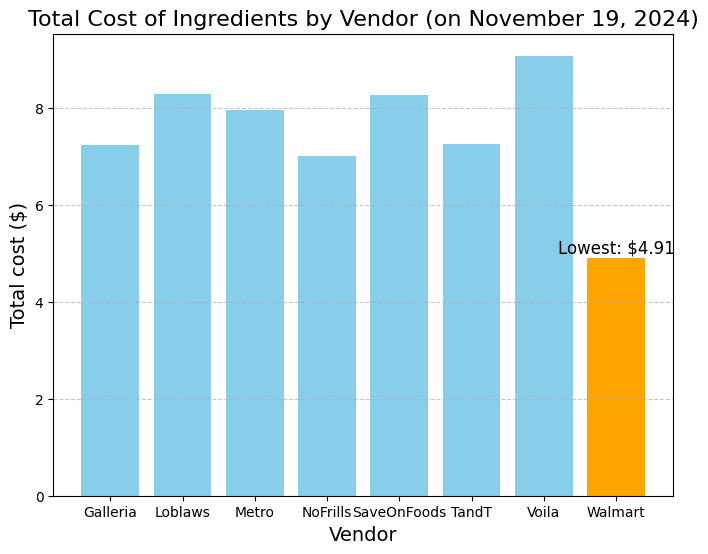

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

merged = pd.read_csv('../data/cleaned_merged_data.csv')

ingredients = ['White Bread', 'Ham', 'Lettuce']
pattern = r'\b(?:' + '|'.join(ingredients) + r')\b'

filtered = merged[merged['product_name'].str.contains(pattern, case=False, na=False)]
filtered = filtered[['nowtime', 'product_name', 'vendor', 'current_price']].copy()
filtered['nowtime'] = pd.to_datetime(filtered['nowtime'], errors='coerce')

specific_date = pd.Timestamp('2024-11-19').date()
filtered = filtered[filtered['nowtime'].dt.date == specific_date]

filtered['current_price'] = pd.to_numeric(filtered['current_price'], errors='coerce')
filtered = filtered.dropna(subset=['current_price'])

def categorize_product(name):
    if 'bread' in name.lower():
        return 'Bread'
    elif 'ham' in name.lower():
        return 'Ham'
    elif 'lettuce' in name.lower():
        return 'Lettuce'
    else:
        return 'Other'

filtered['category'] = filtered['product_name'].apply(categorize_product)

idx = filtered.groupby(['vendor', 'category'])['current_price'].idxmin()

cheapest = filtered.loc[idx].sort_values(['vendor', 'category']).reset_index(drop=True)

sum = cheapest.groupby('vendor', as_index=False)['current_price'].sum()

sum = sum.rename(columns={'current_price': 'sum'})
min_index = sum['sum'].idxmin()
colors = ['skyblue'] * len(sum)
colors[min_index] = 'orange'

plt.figure(figsize=(8, 6))
plt.bar(sum['vendor'], sum['sum'], color=colors)

lowest_price_vendor = sum.loc[min_index, 'vendor']
lowest_price_value = sum.loc[min_index, 'sum']
plt.text(
    min_index, 
    lowest_price_value + 0.1,
    f"Lowest: ${lowest_price_value:.2f}",
    color='black', 
    ha='center', 
    fontsize=12
)

plt.xlabel('Vendor', fontsize=14)
plt.ylabel('Total cost ($)', fontsize=14)
plt.title('Total Cost of Ingredients by Vendor (on November 19, 2024)', fontsize=16)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()